# Is Home Team gonna win?

In [1109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1110]:
df = pd.read_csv('data/dataset/2020-2024 Matches Liga 1 Teams.csv', parse_dates=['DateTime'])
df.drop(['Unnamed: 0'], axis=1, inplace=True)
# Se tomará solo la competición de la Liga 1
df = df.loc[df['Comp'] == 'Liga 1']
df.shape

(2211, 16)

In [1111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2211 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2211 non-null   object        
 1   Time           2211 non-null   object        
 2   Comp           2211 non-null   object        
 3   Round          2211 non-null   object        
 4   Day            2211 non-null   int64         
 5   Venue          2211 non-null   object        
 6   Result         2211 non-null   object        
 7   GF             2211 non-null   object        
 8   GA             2211 non-null   object        
 9   Opponent       2211 non-null   object        
 10  Captain        2151 non-null   object        
 11  Formation      2188 non-null   object        
 12  Opp Formation  2188 non-null   object        
 13  Referee        1800 non-null   object        
 14  Team           2211 non-null   object        
 15  DateTime       2211 non-nu

# Data Cleaning

In [1112]:
# Eliminamos las columnas porque no ofrece información valiosa
df.drop(['Captain', 'Referee'], axis=1, inplace=True)

## Missing values

Imputaremos las formaciones más frequentes a cada equipo por año, para llenar los NaN

### Manejando NaN en 'Formation' 'Opp Formation'

In [1113]:
# Encontramos que existen registros con una formación duplicada (4-4-2◆)
df['Formation'].unique()

array(['4-2-3-1', '4-4-2', '3-5-1-1', '3-5-2', '5-3-2', '3-4-3',
       '4-2-2-2', '4-3-3', '4-5-1', nan, '4-1-4-1', '5-4-1', '4-4-1-1',
       '3-4-1-2', '3-1-4-2', '4-1-3-2', '3-3-3-1', '4-4-2◆', '4-3-1-2',
       '4-3-2-1', '3-2-4-1', '4-2-4'], dtype=object)

In [1114]:
df['Formation'] = df['Formation'].replace('4-4-2◆', value='4-4-2')
df['Formation'].unique()

array(['4-2-3-1', '4-4-2', '3-5-1-1', '3-5-2', '5-3-2', '3-4-3',
       '4-2-2-2', '4-3-3', '4-5-1', nan, '4-1-4-1', '5-4-1', '4-4-1-1',
       '3-4-1-2', '3-1-4-2', '4-1-3-2', '3-3-3-1', '4-3-1-2', '4-3-2-1',
       '3-2-4-1', '4-2-4'], dtype=object)

In [1115]:
df['Opp Formation'].unique()

array(['4-2-3-1', '4-3-3', '4-4-2', '4-1-4-1', '3-5-2', '3-4-3',
       '3-4-1-2', '4-5-1', '4-4-1-1', '5-3-2', '5-4-1', nan, '3-1-4-2',
       '3-2-4-1', '4-3-1-2', '4-1-3-2', '4-2-4', '3-5-1-1', '4-2-2-2',
       '4-3-2-1', '3-3-3-1'], dtype=object)

In [1116]:
# Por cada temporada de cada equipo, se le imputará la formación más frecuente
teams = df['Team'].unique()
for team in teams:
    years = df[df['Team'] == team]['DateTime'].dt.year.unique()
    for year in years:
        conditions = (df['DateTime'].dt.year == year) & (df['Team'] == team)
        # Si existe NaN de un equipo en un año
        # reemplazarlo por el valor que más se repite
        if df[conditions]['Formation'].isnull().any():
            mode = df[conditions]['Formation'].mode()
            df.loc[conditions, 'Formation'] = df[conditions]['Formation'].fillna(value=mode[0])
        # Hacer lo mismo con la formación del equipor rival
        if df[conditions]['Opp Formation'].isnull().any():
            mode = df[conditions]['Opp Formation'].mode()
            df.loc[conditions, 'Opp Formation'] = df[conditions]['Opp Formation'].fillna(value=mode[0])

In [1117]:
print(f'Formation tiene NaN? {df['Formation'].isnull().any()}\nOpp Formation tiene NaN? {df['Opp Formation'].isnull().any()}')

Formation tiene NaN? False
Opp Formation tiene NaN? False


### Inconsistent Data Entry

In [1118]:
df['GF'].unique()

array(['1', '4', '5', '0', '2', '3', '6', '7', '1 (3)', '1 (2)', '12'],
      dtype=object)

In [1119]:
df.loc[df['GF'].str.len() > 2]

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Formation,Opp Formation,Team,DateTime
313,2020-12-05,14:00,Liga 1,Final,5,Away,D,1 (3),1 (2),Sporting Cristal,4-2-3-1,4-3-3,Ayacucho,2020-12-05 14:00:00
551,2020-12-05,14:00,Liga 1,Final,5,Home,D,1 (2),1 (3),Ayacucho,4-3-3,4-2-3-1,Sporting Cristal,2020-12-05 14:00:00


In [1120]:
df.loc[df['GA'].str.len() > 2]

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Formation,Opp Formation,Team,DateTime
313,2020-12-05,14:00,Liga 1,Final,5,Away,D,1 (3),1 (2),Sporting Cristal,4-2-3-1,4-3-3,Ayacucho,2020-12-05 14:00:00
551,2020-12-05,14:00,Liga 1,Final,5,Home,D,1 (2),1 (3),Ayacucho,4-3-3,4-2-3-1,Sporting Cristal,2020-12-05 14:00:00


In [1121]:
# Se tratará como empate y se ignorará los goles de penales
def get_goals(row):
    row['GF'] = row['GF'].split('(')[0].strip()
    row['GA'] = row['GA'].split('(')[0].strip()
    return row
df = df.apply(get_goals, axis=1)

In [1122]:
df['GF'].unique()

array(['1', '4', '5', '0', '2', '3', '6', '7', '12'], dtype=object)

In [1123]:
df['GA'].unique()

array(['2', '0', '1', '4', '3', '5', '6'], dtype=object)

In [1124]:
df = df.astype({'GF': 'int16', 'GA': 'int16'})

In [1125]:
df['GF'].unique()

array([ 1,  4,  5,  0,  2,  3,  6,  7, 12], dtype=int16)

# Baseline - Feature Engineering

Modificaremos el dataset para que los registros de partidos se reduzcan a un solo registro en vez de tener registro del mismo partido por equipo.

Por ejemplo: Partido Cantolao vs Cienciano
- Registro 1: Cantolao (Local)
- Registro 2: Cienciano (Visitante)

Ambos registros pertenecen al mismo partido

Objetivo:
- Registro: Cantolao (Local) vs Cienciano (Visitante)

In [1126]:
df.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Formation,Opp Formation,Team,DateTime
0,2020-02-02,13:00,Liga 1,Torneo Apertura,6,Away,L,1,2,Cantolao,4-2-3-1,4-2-3-1,Cienciano,2020-02-02 13:00:00
1,2020-02-09,15:00,Liga 1,Torneo Apertura,6,Home,W,4,0,USMP,4-2-3-1,4-3-3,Cienciano,2020-02-09 15:00:00
2,2020-02-14,15:00,Liga 1,Torneo Apertura,4,Home,W,5,2,Llacuabamba,4-4-2,4-4-2,Cienciano,2020-02-14 15:00:00
3,2020-02-24,20:00,Liga 1,Torneo Apertura,0,Away,L,0,1,Alianza Univ,4-4-2,4-3-3,Cienciano,2020-02-24 20:00:00
4,2020-02-29,15:30,Liga 1,Torneo Apertura,5,Home,L,1,4,Ayacucho,4-2-3-1,4-2-3-1,Cienciano,2020-02-29 15:30:00


In [1127]:
df.shape

(2211, 14)

## Estandarizar nombre de equipos

In [1128]:
all_teams = df.loc[:,['Opponent', 'Team']].values
all_teams

array([['Cantolao', 'Cienciano'],
       ['USMP', 'Cienciano'],
       ['Llacuabamba', 'Cienciano'],
       ...,
       ['Comerciantes Unidos', 'Sport Boys'],
       ['UTC', 'Sport Boys'],
       ['ADT Tarma', 'Sport Boys']], shape=(2211, 2), dtype=object)

In [1129]:
teams = set([team for teams in all_teams for team in teams])
teams = sorted(teams)
print(teams)

['ADT Tarma', 'Alianza Atlético', 'Alianza Lima', 'Alianza Univ', 'Alianza Universidad', 'Atlético Grau', 'Ayacucho', 'Binacional', 'CDC Santa Rosa', 'Cantolao', 'Carlos Stein', 'Cienciano', 'Comerciantes Unidos', 'Cusco', 'Dep Municipal', 'Deportivo Garcilaso', 'Llacuabamba', 'Mannucci', 'Melgar', 'Sport Boys', 'Sport Huancayo', 'Sporting Cristal', 'U César Vallejo', 'USMP', 'UTC', 'Universidad Técnica de Cajamarca', 'Universitario', 'Unión Comercio']


In [1130]:
from fuzzywuzzy import process
import fuzzywuzzy

for team in teams:
    matches = fuzzywuzzy.process.extract(team, teams, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    for t, score in matches:
        if score >= 75 and score != 100:
            print(team, t, score, sep=' - ')

Alianza Lima - Alianza Univ - 75
Alianza Univ - Alianza Universidad - 77
Alianza Univ - Alianza Lima - 75
Alianza Universidad - Alianza Univ - 77


Por lo expuesto, el único valor que debemos cambiar `Alianza Univ` por `Alianza Universidad` y `Universidad Técnica de Cajamarca` por `UTC`

In [1131]:
df.loc[:, 'Opponent'] = df['Opponent'].replace({'Alianza Univ': 'Alianza Universidad', 'Universidad Técnica de Cajamarca': 'UTC'})
df.loc[:, 'Team'] = df['Team'].replace({'Alianza Univ': 'Alianza Universidad', 'Universidad Técnica de Cajamarca': 'UTC'})

## Ajustando features por partido

In [1132]:
def get_result(row):
    if row['Venue'] == 'Home':
        if row['Result'] == 'W':
            row['Result'] = 0 # Win
        elif row['Result'] == 'D':
            row['Result'] = 1 # Draw
        else:
            row['Result'] = 2 # Lose
    else:
        if row['Result'] == 'W':
            row['Result'] = 2 # Lose
        elif row['Result'] == 'D':
            row['Result'] = 1 # Draw
        else:
            row['Result'] = 0 # Win

In [1133]:
def get_match(row):
    if row['Venue'] == 'Home': # Team es el local
        row['Home Team'] = row['Team']
        row['Away Team'] = row['Opponent']
        get_result(row)
    elif row['Venue'] == 'Away': # Opponent es el local
        row['Home Team'] = row['Opponent']
        row['Away Team'] = row['Team']
        get_result(row)
        row['GF'], row['GA'] = row['GA'], row['GF']
        row['Formation'], row['Opp Formation'] = row['Opp Formation'], row['Formation']
    return row

In [1134]:
df = (df.apply(get_match, axis=1)
      # Borramos los duplicados de partidos que comparten fecha, hora, equipo local y equipo visitante
      .drop_duplicates(subset=['DateTime', 'Home Team', 'Away Team'], ignore_index=True)
      # Borramos columnas que ya no aportan valor
      .drop(['Venue', 'Opponent', 'Team'], axis=1)
      # Ordenar las filas por fecha
      .sort_values(['DateTime'], axis=0, ignore_index=True)
     )

In [1135]:
df.head()

,Date,Time,Comp,Round,Day,Result,GF,GA,Formation,Opp Formation,DateTime,Home Team,Away Team
0,2020-01-31,18:00,Liga 1,Torneo Apertura,4,2,1,2,4-3-3,4-2-3-1,2020-01-31 18:00:00,Melgar,Universitario
1,2020-01-31,20:30,Liga 1,Torneo Apertura,4,2,2,3,3-4-3,4-4-2,2020-01-31 20:30:00,Alianza Lima,Alianza Universidad
2,2020-02-01,15:00,Liga 1,Torneo Apertura,5,0,2,1,4-2-3-1,4-3-3,2020-02-01 15:00:00,UTC,Sporting Cristal
3,2020-02-01,17:30,Liga 1,Torneo Apertura,5,0,1,0,4-2-3-1,4-2-3-1,2020-02-01 17:30:00,Sport Huancayo,Atlético Grau
4,2020-02-02,11:00,Liga 1,Torneo Apertura,6,0,3,1,4-3-3,4-4-2,2020-02-02 11:00:00,USMP,Ayacucho


In [1136]:
df.shape

(1416, 13)

## Analizar columna 'Round'
Verificamos que existe `Final` y `Finals` en la columna 'Round'

In [1137]:
df['Round'].unique()

array(['Torneo Apertura', 'Group Stage', 'Final', 'Semi-finals', 'Finals',
       'Torneo Clausura'], dtype=object)

In [1138]:
# Reemplazamos las filas con valor Finals con Final
df.loc[df['Round'] == 'Finals', 'Round'] = 'Final'

In [1139]:
# Columnas del nuevo dataframe
columns = ['DateTime', 'Day', 'Time', 'Round', 'Home Team', 'Away Team', 'GF', 'GA', 'Formation', 'Opp Formation', 'Result']

In [1140]:
df = df[columns]
df.head()

,DateTime,Day,Time,Round,Home Team,Away Team,GF,GA,Formation,Opp Formation,Result
0,2020-01-31 18:00:00,4,18:00,Torneo Apertura,Melgar,Universitario,1,2,4-3-3,4-2-3-1,2
1,2020-01-31 20:30:00,4,20:30,Torneo Apertura,Alianza Lima,Alianza Universidad,2,3,3-4-3,4-4-2,2
2,2020-02-01 15:00:00,5,15:00,Torneo Apertura,UTC,Sporting Cristal,2,1,4-2-3-1,4-3-3,0
3,2020-02-01 17:30:00,5,17:30,Torneo Apertura,Sport Huancayo,Atlético Grau,1,0,4-2-3-1,4-2-3-1,0
4,2020-02-02 11:00:00,6,11:00,Torneo Apertura,USMP,Ayacucho,3,1,4-3-3,4-4-2,0


## Goals Scored and Goals Conceded

In [1141]:
seasons = df['DateTime'].dt.year.unique()
seasons

array([2020, 2021, 2022, 2023, 2024], dtype=int32)

In [1142]:
"""
Por cada temporada, obtenemos los goles que los equipos de local y visitante 
han marcado a FAVOR. Estos goles serán guardados en las columnas 
'AHGS' (Accumulated Home Goals Scored) y 'AAGS' (Accumulated Away Goals Scored)
"""
goals_scored = dict()
for i in range(len(df)):
    hteam = df.loc[i, 'Home Team']
    ateam = df.loc[i, 'Away Team']
    season = df.loc[i, 'DateTime'].year

    # Si en el diccionario existe el equipo local en la temporada indicada
    # Se asigna el valor de goles acumulados del equipo.
    # Sino, se inicializa con 0
    if (season, hteam) in goals_scored.keys():
        df.loc[i, 'HGS'] = goals_scored[(season, hteam)]
    else:
        df.loc[i, 'HGS'] = 0
        goals_scored[(season, hteam)] = 0

    # Si en el diccionario existe el equipo visitante en la temporada indicada
    # Se asigna el valor de goles a FAVOR acumulados del equipo.
    # Sino, se inicializa con 0
    if (season, ateam) in goals_scored.keys():
        df.loc[i, 'AGS'] = goals_scored[(season, ateam)]
    else:
        df.loc[i, 'AGS'] = 0
        goals_scored[(season, ateam)] = 0

    # Se suma los goles a FAVOR del equipo local y visitante al diccionario
    # del partido en el índice i para asignarlo en la siguiente
    # iteración donde los equipos jueguen.
    goals_scored[(season, hteam)] += df.loc[i, 'GF']
    goals_scored[(season, ateam)] += df.loc[i, 'GA']

In [1143]:
"""
Por cada temporada, obtenemos los goles que los equipos de local y visitante 
han marcado en CONTRA. Estos goles serán guardados en las columnas 
'HGC' (Home Goals Conceded) y 'AGC' (Away Goals Conceded)
"""
goals_conceded = dict()
for i in range(len(df)):
    hteam = df.loc[i, 'Home Team']
    ateam = df.loc[i, 'Away Team']
    season = df.loc[i, 'DateTime'].year

    # Si en el diccionario existe el equipo local en la temporada indicada
    # Se asigna el valor de goles en CONTRA acumulados del equipo.
    # Sino, se inicializa con 0
    if (season, hteam) in goals_conceded.keys():
        df.loc[i, 'HGC'] = goals_conceded[(season, hteam)]
    else:
        df.loc[i, 'HGC'] = 0
        goals_conceded[(season, hteam)] = 0

    if (season, ateam) in goals_conceded.keys():
        df.loc[i, 'AGC'] = goals_conceded[(season, ateam)]
    else:
        df.loc[i, 'AGC'] = 0
        goals_conceded[(season, ateam)] = 0
        
    goals_conceded[(season, hteam)] += df.loc[i, 'GA']
    goals_conceded[(season, ateam)] += df.loc[i, 'GF']

## Puntos acumulados por temporada y Fecha de partido

In [1144]:
"""
Por cada temporada, obtenemos los puntos que los equipos de local y visitante 
acumulados. Estos puntos serán guardados en las columnas 
'AHP' (Home Teams Points) y 'AAP' (Away Teams Points)
"""
points_accumulated = dict()
match_week = dict()
change = 0
for i in range(len(df)):
    season = df.loc[i, 'DateTime'].year
    hteam = df.loc[i, 'Home Team']
    ateam = df.loc[i, 'Away Team']

    if change != season:
        match_week = dict()
        points_accumulated = dict()
        change = season

    if hteam in match_week.keys():
        match_week[hteam] = match_week[hteam] + 1
    else:
        match_week[hteam] = 1

    if ateam in match_week.keys():
        match_week[ateam] = match_week[ateam] + 1
    else:
        match_week[ateam] = 1

    match_week_final = max([match_week[hteam], match_week[ateam]])
    df.loc[i, 'MW'] = match_week_final
    match_week[hteam] = match_week_final
    match_week[ateam] = match_week_final

    if hteam in points_accumulated.keys():
        df.loc[i, 'HTP'] = points_accumulated[hteam]
    else:
        df.loc[i, 'HTP'] = 0
        points_accumulated[hteam] = 0

    if ateam in points_accumulated.keys():
        df.loc[i, 'ATP'] = points_accumulated[ateam]
    else:
        df.loc[i, 'ATP'] = 0
        points_accumulated[ateam] = 0

    if (df.loc[i, 'Result'] == 0): # Home Win
        points_accumulated[hteam] += 3
    elif (df.loc[i, 'Result'] == 1): # Draw
        points_accumulated[hteam] += 1
        points_accumulated[ateam] += 1
    else: # Home Lose
        points_accumulated[ateam] += 3

## Racha de partidos sin perder

In [1145]:
undefeated_streak = dict()
for i in range(len(df)):
    hteam = df.loc[i, 'Home Team']
    ateam = df.loc[i, 'Away Team']

    if hteam in undefeated_streak.keys():
        df.loc[i, 'HUS'] = undefeated_streak[hteam]
    else:
        undefeated_streak[hteam] = 0
        df.loc[i, 'HUS'] = 0
    
    if ateam in undefeated_streak.keys():
        df.loc[i, 'AUS'] = undefeated_streak[ateam]
    else:
        undefeated_streak[ateam] = 0
        df.loc[i, 'AUS'] = 0

    if df.loc[i, 'Result'] == 0:
        undefeated_streak[hteam] += 1
        undefeated_streak[ateam] = 0
    elif df.loc[i, 'Result'] == 1:
        undefeated_streak[hteam] += 1
        undefeated_streak[ateam] += 1
    elif df.loc[i, 'Result'] == 2:
        undefeated_streak[hteam] = 0
        undefeated_streak[ateam] += 1

## Racha de derrotas

In [1146]:
losing_streak = dict()
for i in range(len(df)):
    hteam = df.loc[i, 'Home Team']
    ateam = df.loc[i, 'Away Team']

    if hteam in losing_streak.keys():
        df.loc[i, 'HLS'] = losing_streak[hteam]
    else:
        losing_streak[hteam] = 0
        df.loc[i, 'HLS'] = 0

    if ateam in losing_streak.keys():
        df.loc[i, 'ALS'] = losing_streak[ateam]
    else:
        losing_streak[ateam] = 0
        df.loc[i, 'ALS'] = 0

    result = df.loc[i, 'Result']
    if result == 0: # Local win
        losing_streak[hteam] = 0
        losing_streak[ateam] += 1
    elif result == 1: # Draw
        losing_streak[hteam] = 0
        losing_streak[ateam] = 0
    elif result == 2: # Local Lose
        losing_streak[hteam] += 1
        losing_streak[ateam] = 0

In [1147]:
change = 0
last_matches = dict()
for i in range(len(df)):
    hteam = df.loc[i, 'Home Team']
    ateam = df.loc[i, 'Away Team']
    season = df.loc[i, 'DateTime'].year
    result = df.loc[i, 'Result']

    if change != season:
        last_matches = dict()
        change = season

    # El primer partido tendrá valor M de cada equipo por temporada
    if hteam not in last_matches.keys():
        last_matches[hteam] = ['M' for j in range(5)]
        
    if ateam not in last_matches.keys():
        last_matches[ateam] = ['M' for j in range(5)]

    # Se asigna el valor de partidos anteriores
    for j in range(5):
        df.loc[i, str(j + 1) + '_RHT'] = last_matches[hteam][j]
    for j in range(5):
        df.loc[i, str(j + 1) + '_RAT'] = last_matches[ateam][j]

    # Agregamos el resultado actual a la lista
    last_matches[hteam].pop()
    last_matches[ateam].pop()
    
    if result == 0: # Home Win
        last_matches[hteam].insert(0, 'W')
        last_matches[ateam].insert(0, 'L')
    elif result == 1: # Draw
        last_matches[hteam].insert(0, 'D')
        last_matches[ateam].insert(0, 'D')
    else: # Home Lose
        last_matches[hteam].insert(0, 'L')
        last_matches[ateam].insert(0, 'W')

## Diferencia de Goles

In [1148]:
df['HGD'] = df['HGS'] - df['HGC']
df['AGD'] = df['AGS'] - df['AGC']

## Diferencia de puntos

In [1149]:
df['PD'] = df['HTP'] - df['ATP']

In [1150]:
df.shape

(1416, 35)

## Resultado solo de victoria solo para el local (Ganó o no)

In [1151]:
def home_win(row):
    if row == 0:
        row = 1 # Victoria
    else:
        row = 0 # NO Victoria
    return row
df['Result'] = df['Result'].apply(home_win)

In [1152]:
pd.set_option("display.max_columns", None)
df.head(20)

,DateTime,Day,Time,Round,Home Team,Away Team,GF,GA,Formation,Opp Formation,Result,HGS,AGS,HGC,AGC,MW,HTP,ATP,HUS,AUS,HLS,ALS,1_RHT,2_RHT,3_RHT,4_RHT,5_RHT,1_RAT,2_RAT,3_RAT,4_RAT,5_RAT,HGD,AGD,PD
0,2020-01-31 18:00:00,4,18:00,Torneo Apertura,Melgar,Universitario,1,2,4-3-3,4-2-3-1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,0.0,0.0,0.0
1,2020-01-31 20:30:00,4,20:30,Torneo Apertura,Alianza Lima,Alianza Universidad,2,3,3-4-3,4-4-2,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,0.0,0.0,0.0
2,2020-02-01 15:00:00,5,15:00,Torneo Apertura,UTC,Sporting Cristal,2,1,4-2-3-1,4-3-3,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,0.0,0.0,0.0
3,2020-02-01 17:30:00,5,17:30,Torneo Apertura,Sport Huancayo,Atlético Grau,1,0,4-2-3-1,4-2-3-1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,0.0,0.0,0.0
4,2020-02-02 11:00:00,6,11:00,Torneo Apertura,USMP,Ayacucho,3,1,4-3-3,4-4-2,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,0.0,0.0,0.0
5,2020-02-02 13:00:00,6,13:00,Torneo Apertura,Cantolao,Cienciano,2,1,4-2-3-1,4-2-3-1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,0.0,0.0,0.0
6,2020-02-02 15:30:00,6,15:30,Torneo Apertura,Sport Boys,Llacuabamba,3,2,4-3-3,4-2-3-1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,0.0,0.0,0.0
7,2020-02-03 15:00:00,0,15:00,Torneo Apertura,Cusco,Binacional,0,2,4-4-2,4-2-3-1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,0.0,0.0,0.0
8,2020-02-07 15:00:00,4,15:00,Torneo Apertura,Ayacucho,Sport Boys,2,1,4-4-2,4-2-3-1,1,1.0,3.0,3.0,2.0,2.0,0.0,3.0,0.0,1.0,1.0,0.0,L,M,M,M,M,W,M,M,M,M,-2.0,1.0,-3.0
9,2020-02-08 13:15:00,5,13:15,Torneo Apertura,Atlético Grau,U César Vallejo,1,1,4-2-3-1,4-2-3-1,0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,L,M,M,M,M,M,M,M,M,M,-1.0,0.0,0.0


## Forma del equipo

In [1153]:
cols = ['HGD', 'AGD', 'HTP', 'ATP']
for col in cols:
    df[col + 'Form'] = df[col] / df['MW']

# Points Difference Form
df['PDForm'] = df['HTPForm'] - df['ATPForm']

In [1154]:
df.tail()

,DateTime,Day,Time,Round,Home Team,Away Team,GF,GA,Formation,Opp Formation,Result,HGS,AGS,HGC,AGC,MW,HTP,ATP,HUS,AUS,HLS,ALS,1_RHT,2_RHT,3_RHT,4_RHT,5_RHT,1_RAT,2_RAT,3_RAT,4_RAT,5_RAT,HGD,AGD,PD,HGDForm,AGDForm,HTPForm,ATPForm,PDForm
1411,2024-11-02 15:15:00,5,15:15,Torneo Clausura,Mannucci,Alianza Atlético,2,2,4-3-3,5-4-1,0,28.0,26.0,60.0,32.0,35.0,24.0,43.0,1.0,1.0,0.0,0.0,W,L,L,L,D,W,L,W,W,W,-32.0,-6.0,-19.0,-0.914286,-0.171429,0.685714,1.228571,-0.542857
1412,2024-11-03 11:00:00,6,11:00,Torneo Clausura,Sporting Cristal,Comerciantes Unidos,3,0,4-2-3-1,4-3-3,1,88.0,36.0,35.0,57.0,35.0,71.0,35.0,2.0,2.0,0.0,0.0,W,W,L,W,D,D,D,L,L,L,53.0,-21.0,36.0,1.514286,-0.600000,2.028571,1.000000,1.028571
1413,2024-11-03 15:00:00,6,15:00,Torneo Clausura,Melgar,Deportivo Garcilaso,1,1,4-3-3,5-3-2,0,65.0,36.0,34.0,42.0,35.0,69.0,36.0,8.0,0.0,0.0,1.0,W,W,W,D,D,L,D,W,L,W,31.0,-6.0,33.0,0.885714,-0.171429,1.971429,1.028571,0.942857
1414,2024-11-03 15:00:00,6,15:00,Torneo Clausura,CDC Santa Rosa,Universitario,0,0,3-4-3,3-5-2,0,42.0,63.0,47.0,17.0,35.0,38.0,76.0,0.0,1.0,1.0,0.0,L,W,L,W,L,W,L,W,W,W,-5.0,46.0,-38.0,-0.142857,1.314286,1.085714,2.171429,-1.085714
1415,2024-11-03 15:00:00,6,15:00,Torneo Clausura,Alianza Lima,Cusco,1,2,3-4-3,4-2-3-1,0,56.0,48.0,25.0,43.0,35.0,69.0,57.0,5.0,0.0,0.0,2.0,W,W,W,D,W,L,L,W,W,D,31.0,5.0,12.0,0.885714,0.142857,1.971429,1.628571,0.342857


# Visualizar datos

## Cuántos partidos fueron ganados por los locales en cada temporada?

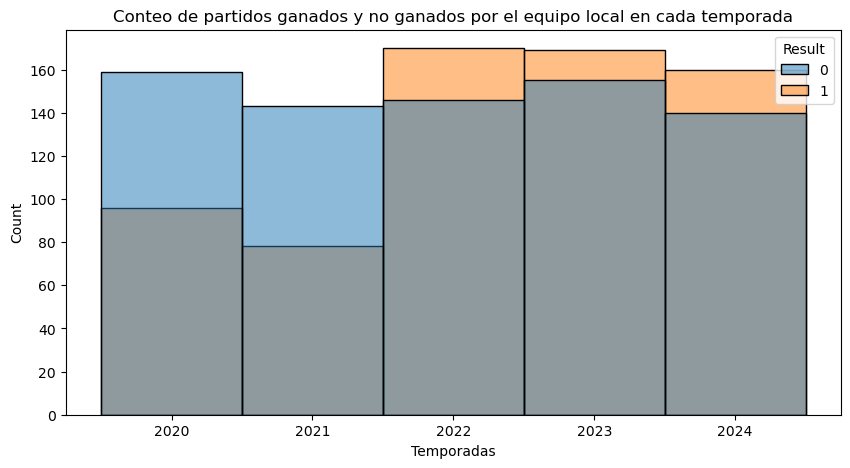

In [1155]:
plt.figure(figsize=(10, 5))
years = df['DateTime'].dt.year
sns.histplot(data=df, x=years, hue='Result', discrete=True)
plt.xlabel('Temporadas')
plt.title('Conteo de partidos ganados y no ganados por el equipo local en cada temporada')
plt.show()

Se puede observar que durante los años 2020 y 2021, los equipos locales no pudieron consagrar un gran número de victorias.
Esto se puede deber a que durante esos años la pandemia produjo que los partidos se jueguen en Lima. 
Lo que ocasionó que exista una ausencia de localía o visita, favoreciendo a los equipos de Lima.
Es una gráfica interesante que refleja el impacto del COVID-19 en el campeonato.


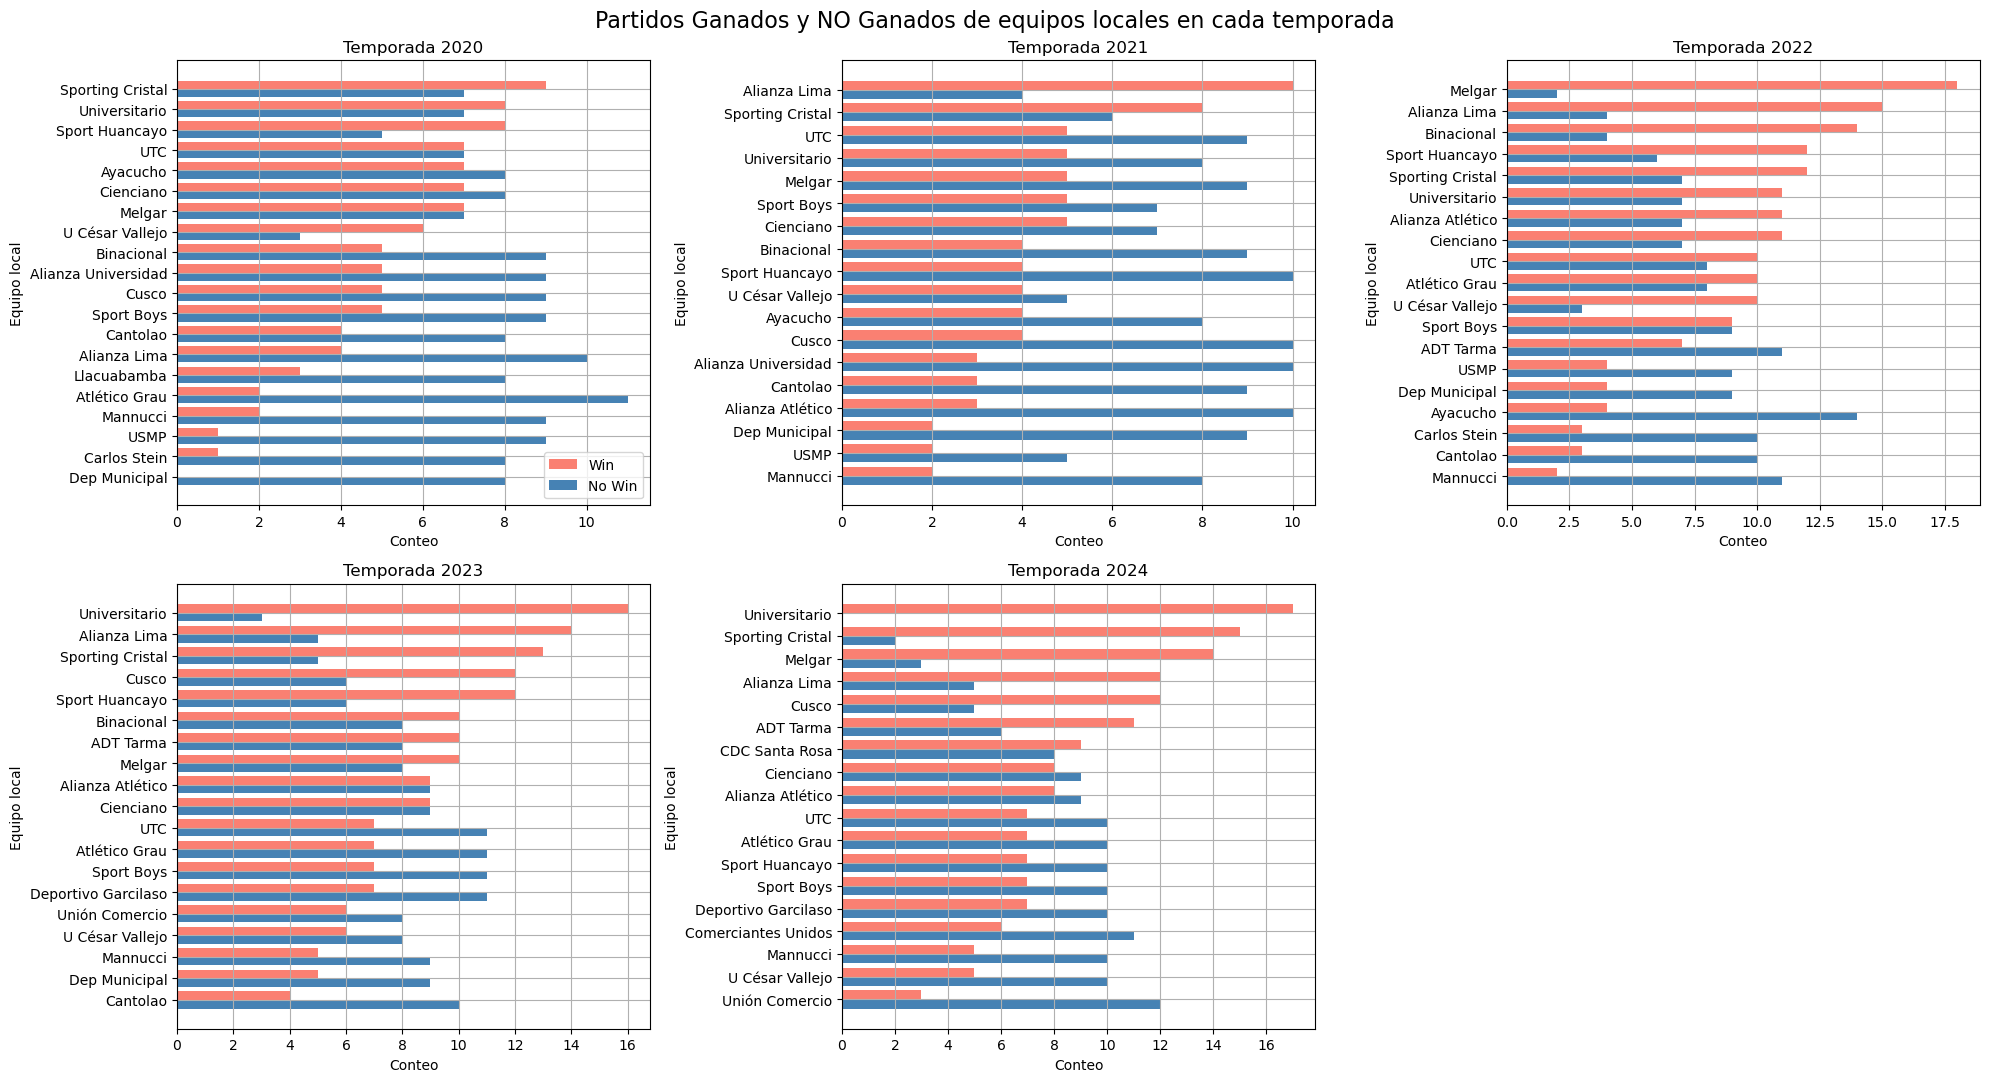

In [1156]:
years = df['DateTime'].dt.year.unique()
n = len(years)
cols = 3 if n % 2 != 0 else 2
rows = round(n / cols)

fig, axs = plt.subplots(rows, cols, figsize=(20, 11))

for i, year in enumerate(years):
    df_by_year = (df
                 .loc[df['DateTime'].dt.year == year]
                 .groupby(['Home Team', 'Result'])
                 .count()['Day']
                 .unstack(level='Result')
                 .fillna(0)
                ).sort_values(by=1, ascending=True)
    df_by_year.columns = ['No Win', 'Win']
    
    teams = df_by_year.index.to_list()
    positions = np.arange(len(teams))
    
    ax = axs.flat[i]
    offset = 0.2

    ax.barh(positions + offset, df_by_year['Win'], label='Win', color='salmon', height=0.4)
    ax.barh(positions - offset, df_by_year['No Win'], label='No Win', color='steelblue', height=0.4)
    
    ax.set_title('Temporada ' + str(year))
    ax.set_xlabel('Conteo')
    ax.set_ylabel('Equipo local')
    
    ax.set_yticks(positions)
    ax.set_yticklabels(teams)
    ax.grid()

    if i == 0:
        ax.legend()

if n % 2 != 0:
    fig.delaxes(axs.flat[n])

fig.suptitle('Partidos Ganados y NO Ganados de equipos locales en cada temporada', fontsize=16)
plt.tight_layout()
plt.show()

In [1157]:
# Filtrar columnas útiles
# Trabajar variables categóricas
# Temporada 2024 será el Test
# Modelar